In [1]:
!pip install diffusers accelerate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 65.8 MB/s eta 0:00:00


In [47]:
from diffusers import AutoPipelineForInpainting, AutoencoderKL
from diffusers.utils import load_image
import torch

vae = AutoencoderKL.from_pretrained("madebyollin/sdxl-vae-fp16-fix", torch_dtype=torch.float16)

pipeline = AutoPipelineForInpainting.from_pretrained("diffusers/stable-diffusion-xl-1.0-inpainting-0.1",
                                                     vae=vae,
                                                     torch_dtype=torch.float16,
                                                     variant="fp16",
                                                     use_safetensors=True
                                                    ).to("cuda")
pipeline.load_ip_adapter("h94/IP-Adapter", subfolder="sdxl_models", weight_name="ip-adapter_sdxl.bin", low_cpu_mem_usage=True)

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

The config attributes {'decay': 0.9999, 'inv_gamma': 1.0, 'min_decay': 0.0, 'optimization_step': 37000, 'power': 0.6666666666666666, 'update_after_step': 0, 'use_ema_warmup': False} were passed to UNet2DConditionModel, but are not expected and will be ignored. Please verify your config.json configuration file.


In [48]:
image = load_image('b.jpg').convert("RGB")
ip_image = load_image('a.png').convert("RGB")

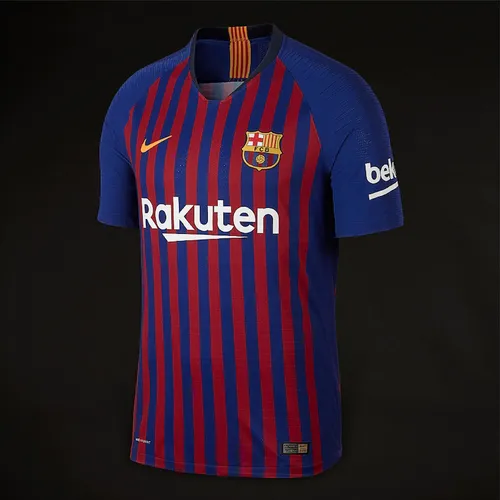

In [49]:
ip_image

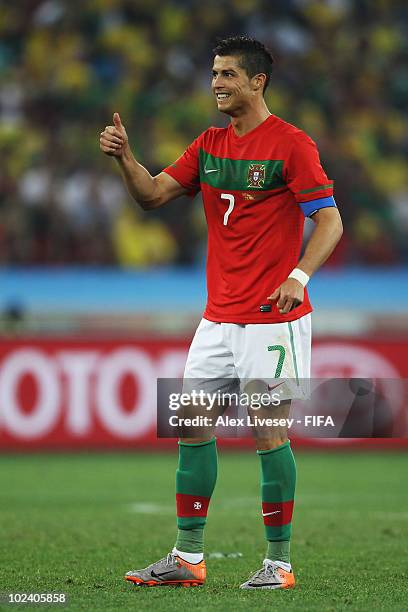

In [50]:
image

In [4]:
! git clone https://github.com/TonyAssi/Segment-Body.git
%cd /content/Segment-Body
! pip install -r requirements.txt
! cp ./SegBody.py ..
%cd ..

Cloning into 'Segment-Body'...
remote: Enumerating objects: 40, done.
remote: Counting objects: 100% (40/40), done.
remote: Compressing objects: 100% (36/36), done.
remote: Total 40 (delta 10), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (40/40), 14.29 KiB | 14.29 MiB/s, done.
Resolving deltas: 100% (10/10), done.
/content/Segment-Body
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 439.5/439.5 kB 22.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.2/13.2 MB 92.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 90.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 7.5 MB/s eta 0:00:00
  Created wheel for insightface: filename=insightface-0.7.3-cp310-cp310-linux_x86_64.whl size=1055391 sha25

In [51]:
from SegBody import segment_body
seg_image, mask_image = segment_body(image, face=False)

In [52]:
pipeline.set_ip_adapter_scale(1.0)

In [53]:
final_image = pipeline(
    prompt="photorealistic, perfect body, beautiful skin, realistic skin, natural skin",
    negative_prompt="ugly, bad quality, bad anatomy, deformed body, deformed hands, deformed feet, deformed face, deformed clothing, deformed skin, bad skin, leggings, tights, stockings",
    image=image,
    mask_image=mask_image,
    ip_adapter_image=ip_image,
    strength=0.99,
    guidance_scale=5,
    num_inference_steps=100,
).images[0]


  0%|          | 0/99 [00:00<?, ?it/s]

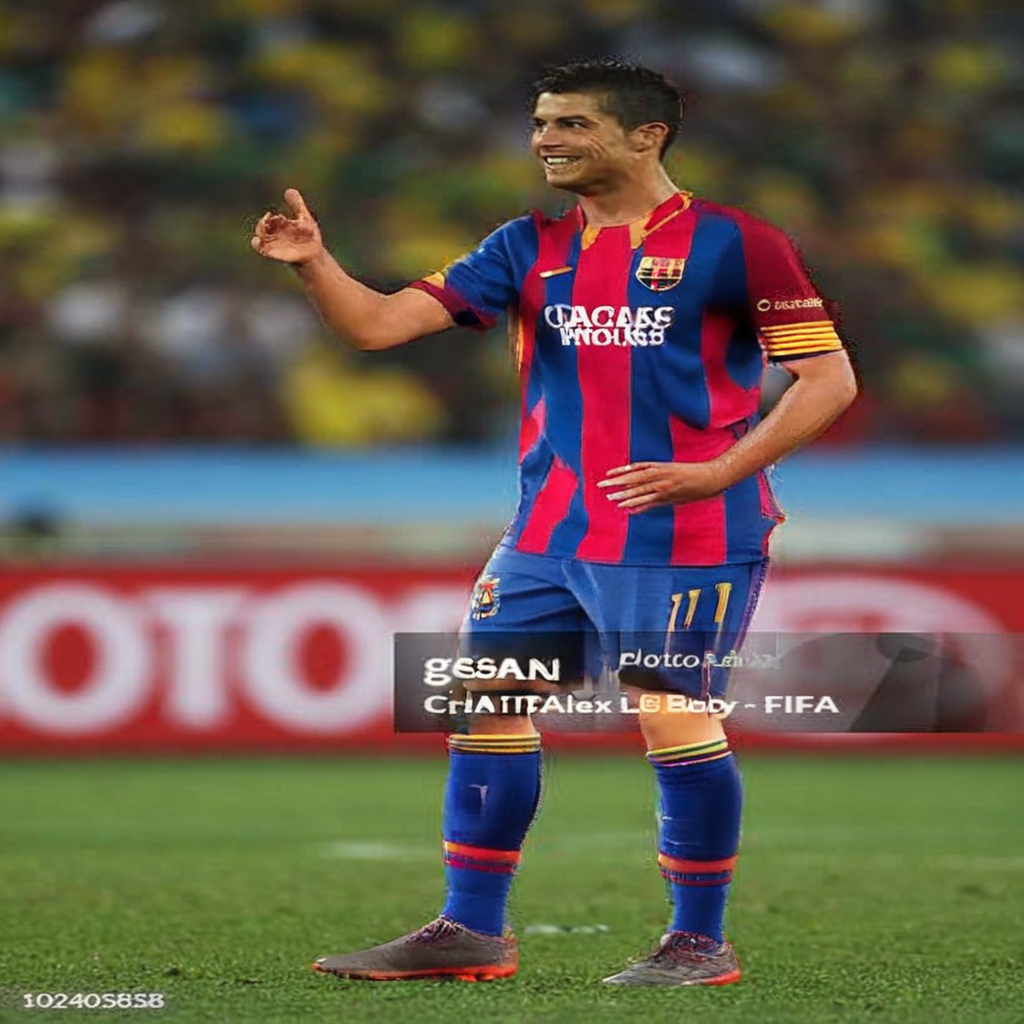

In [54]:
final_image

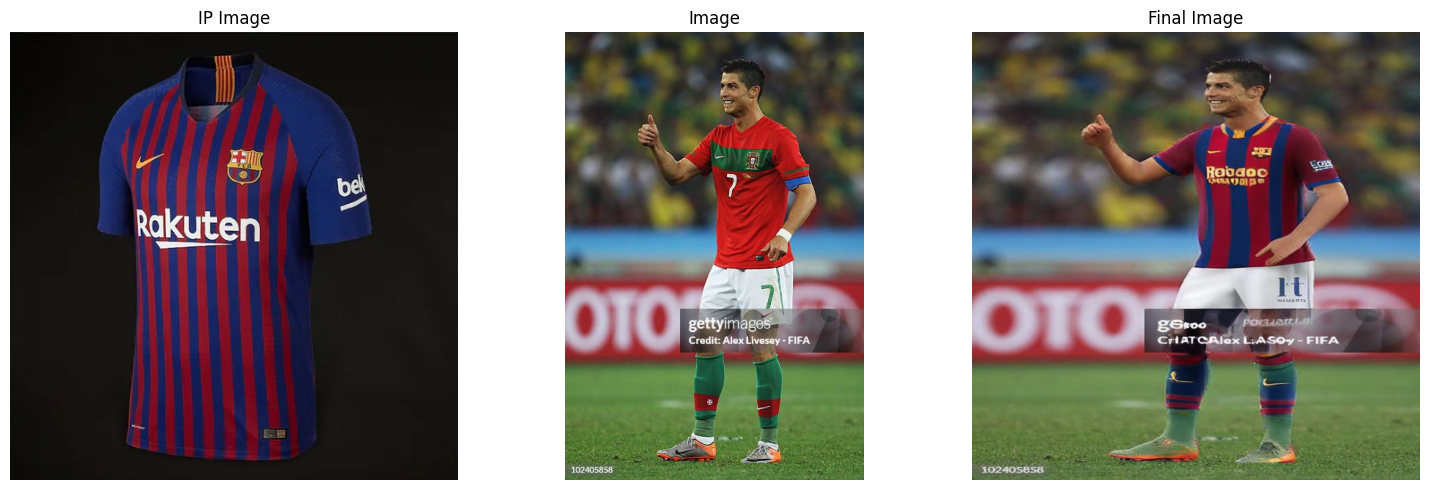

In [23]:
import matplotlib.pyplot as plt
from PIL import Image

fig, axs = plt.subplots(1, 3, figsize=(15, 5))


axs[0].imshow(ip_image)
axs[0].set_title("IP Image")
axs[0].axis("off")

axs[1].imshow(image)
axs[1].set_title("Image")
axs[1].axis("off")

axs[2].imshow(final_image)
axs[2].set_title("Final Image")
axs[2].axis("off")

plt.tight_layout()
plt.show()


In [59]:
image = load_image('b.jpg').convert("RGB")
ip_image = load_image('madrid.png').convert("RGB")
from SegBody import segment_body
seg_image, mask_image = segment_body(image, face=False)
final_image = pipeline(
    prompt="photorealistic, perfect body, beautiful skin, realistic skin, natural skin",
    negative_prompt="ugly, bad quality, bad anatomy, deformed body, deformed hands, deformed feet, deformed face, deformed clothing, deformed skin, bad skin, leggings, tights, stockings",
    image=image,
    mask_image=mask_image,
    ip_adapter_image=ip_image,
    strength=0.99,
    guidance_scale=5,
    num_inference_steps=100,
).images[0]


  0%|          | 0/99 [00:00<?, ?it/s]

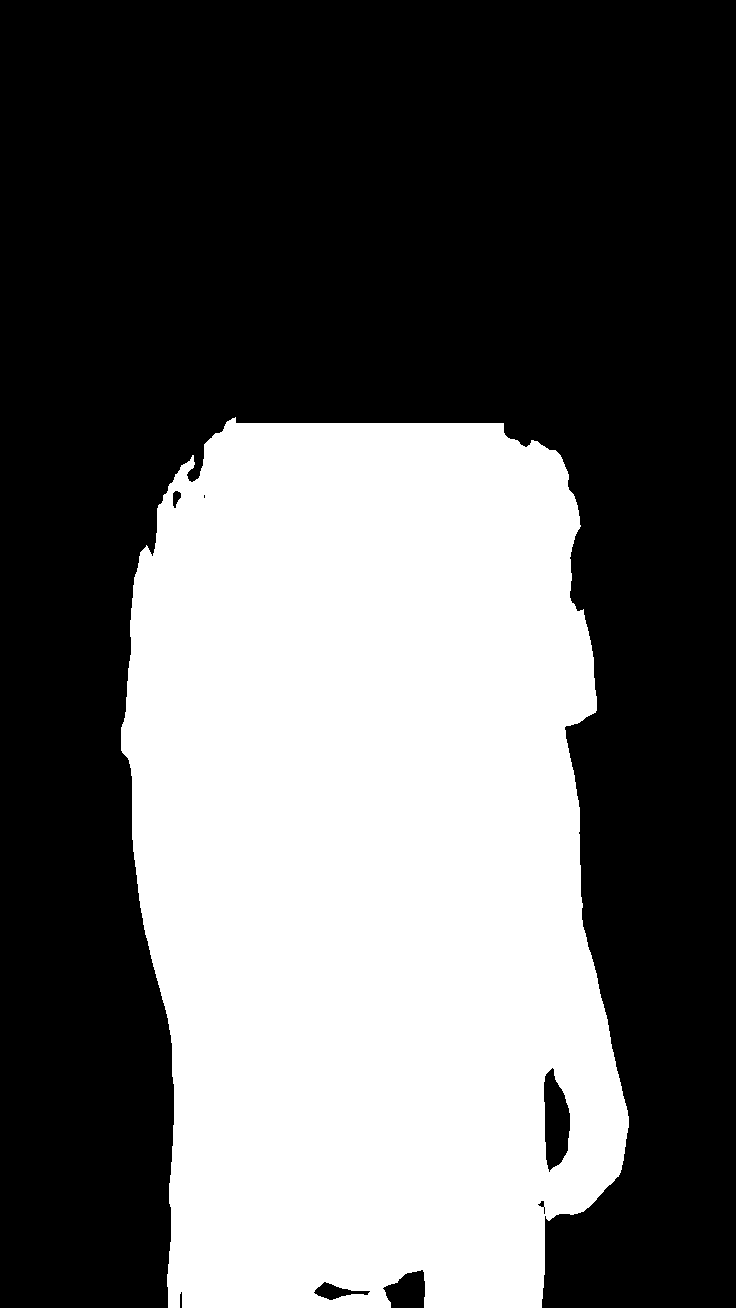

In [58]:
mask_image

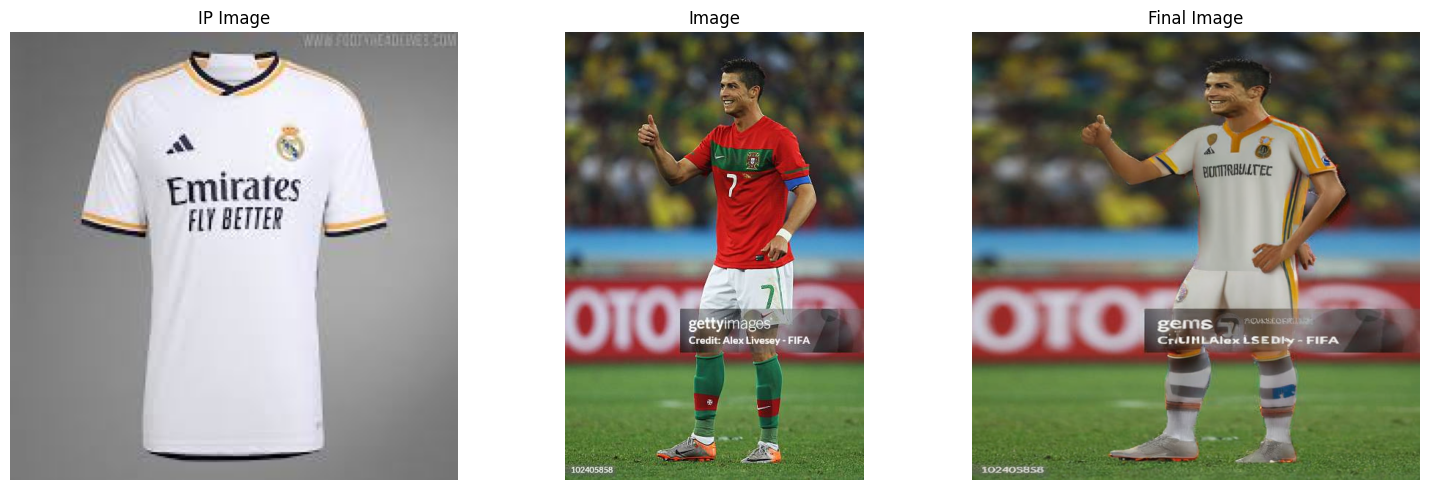

In [60]:
import matplotlib.pyplot as plt
from PIL import Image

fig, axs = plt.subplots(1, 3, figsize=(15, 5))


axs[0].imshow(ip_image)
axs[0].set_title("IP Image")
axs[0].axis("off")

axs[1].imshow(image)
axs[1].set_title("Image")
axs[1].axis("off")

axs[2].imshow(final_image)
axs[2].set_title("Final Image")
axs[2].axis("off")

plt.tight_layout()
plt.show()
